#Package Import

In [1]:
# from google.colab import data_table
# data_table.enable_dataframe_formatter

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns


import pickle

import matplotlib.pyplot as plt



#Data Loading And Pre-processing

###Reading Data

In [3]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parents[1]))
from Helper_Functions import common_utils
directory_to_extract_to = os.getcwd()

common_utils.load_data_from_one_drive(directory_to_extract_to, "recommendation_paths", "dish_recommendation")

Extracting : 100%|██████████| 1/1 [00:00<00:00, 143.16it/s]


In [ ]:
df = pd.read_csv('./Dataset/indian_food.csv')

In [6]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


###Column and row numbers

In [7]:
df.shape

(255, 9)

In [8]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

### Handling Null Values

In [9]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [10]:
df['flavor_profile'].value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [11]:
df['diet'].value_counts()


vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [12]:
df['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [13]:
df.replace(-1,np.nan,inplace = True)

In [14]:
df.replace('-1',np.nan,inplace = True)

In [15]:
df = df.dropna().reset_index(drop=True)

In [16]:
df["index"]=df.index

In [17]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'index'],
      dtype='object')

In [18]:
df.shape

(180, 10)

#Data Visualisation

###Column-wise Countplot and Pie-Chart

In [19]:
columns_for_visualisation = ['flavor_profile', 'course', 'region','diet']

********** flavor_profile **********
spicy     102
sweet      73
bitter      4
sour        1
Name: flavor_profile, dtype: int64
 


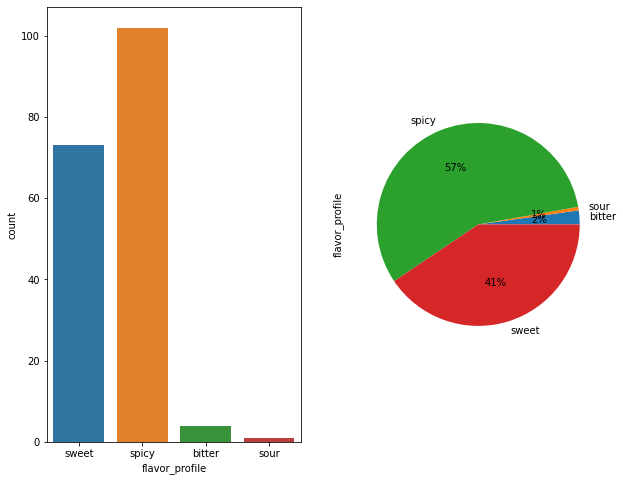

********** course **********
main course    83
dessert        70
snack          25
starter         2
Name: course, dtype: int64
 


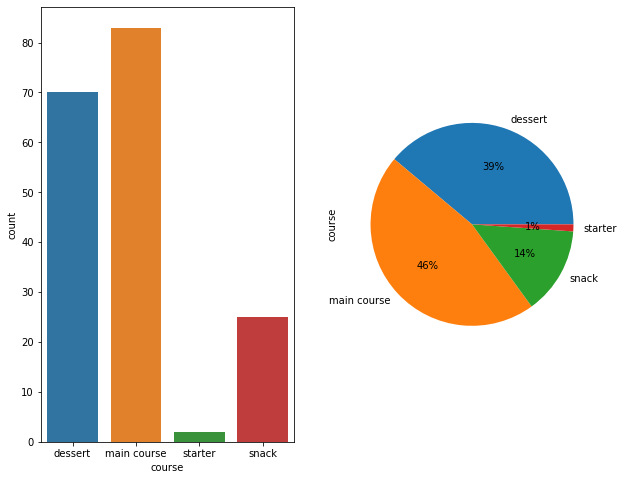

********** region **********
West          60
North         45
South         37
East          25
North East    10
Central        3
Name: region, dtype: int64
 


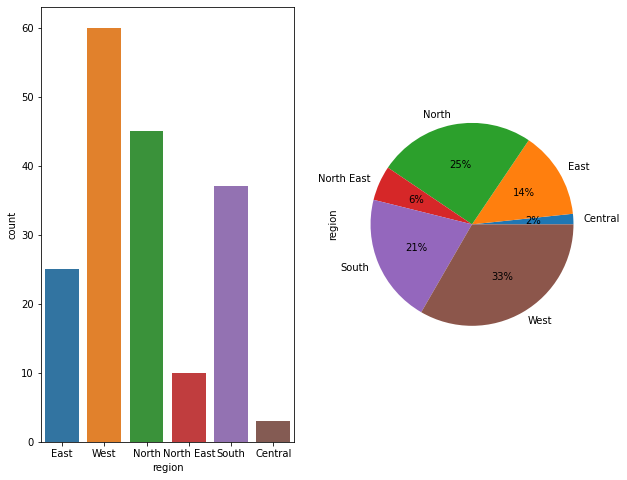

********** diet **********
vegetarian        163
non vegetarian     17
Name: diet, dtype: int64
 


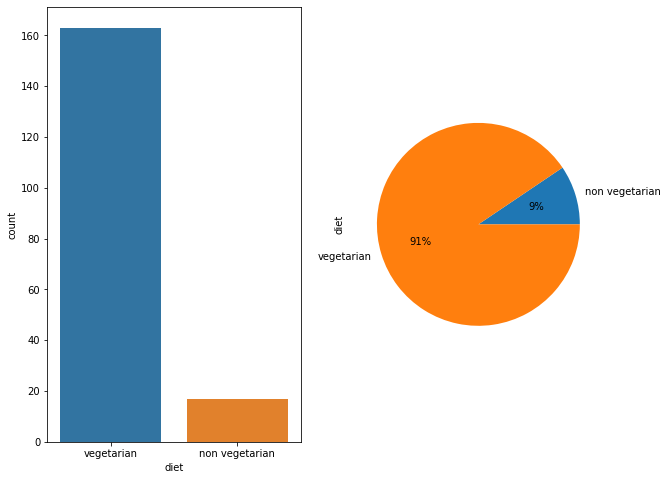

In [20]:
for col in columns_for_visualisation:
    # sns.set(rc={'figure.figsize':(6,6)})
    plt.subplot(1,2,1)
    print("********** "+col+" **********")
    print(df[col].value_counts())

   
    # count plot on single categorical variable
    sns.countplot(x =col, data = df)
   
    print(" ")
    plt.subplot(1,2,2)
    flavor_profile_pie = df[col].value_counts()
    flavor_profile_pie.groupby(flavor_profile_pie.index).sum().plot(kind='pie', y=flavor_profile_pie.values, autopct='%1.0f%%',figsize = (10,8))

    # Show the plot
    plt.show()
    

   
  

<AxesSubplot:ylabel='diet'>

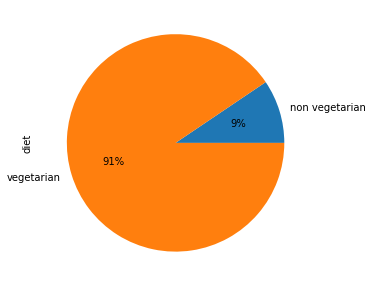

In [21]:
flavor_profile_pie = df[col].value_counts()
flavor_profile_pie.groupby(flavor_profile_pie.index).sum().plot(kind='pie', y=flavor_profile_pie.values, autopct='%1.0f%%',figsize = (5,5))

********** state **********
Punjab             30
Gujarat            29
Maharashtra        23
West Bengal        20
Tamil Nadu         13
Andhra Pradesh     10
Uttar Pradesh       8
Assam               8
Rajasthan           6
Karnataka           5
Telangana           5
Odisha              5
Kerala              4
Bihar               3
Madhya Pradesh      2
Goa                 2
Uttarakhand         1
Manipur             1
Nagaland            1
NCT of Delhi        1
Jammu & Kashmir     1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64


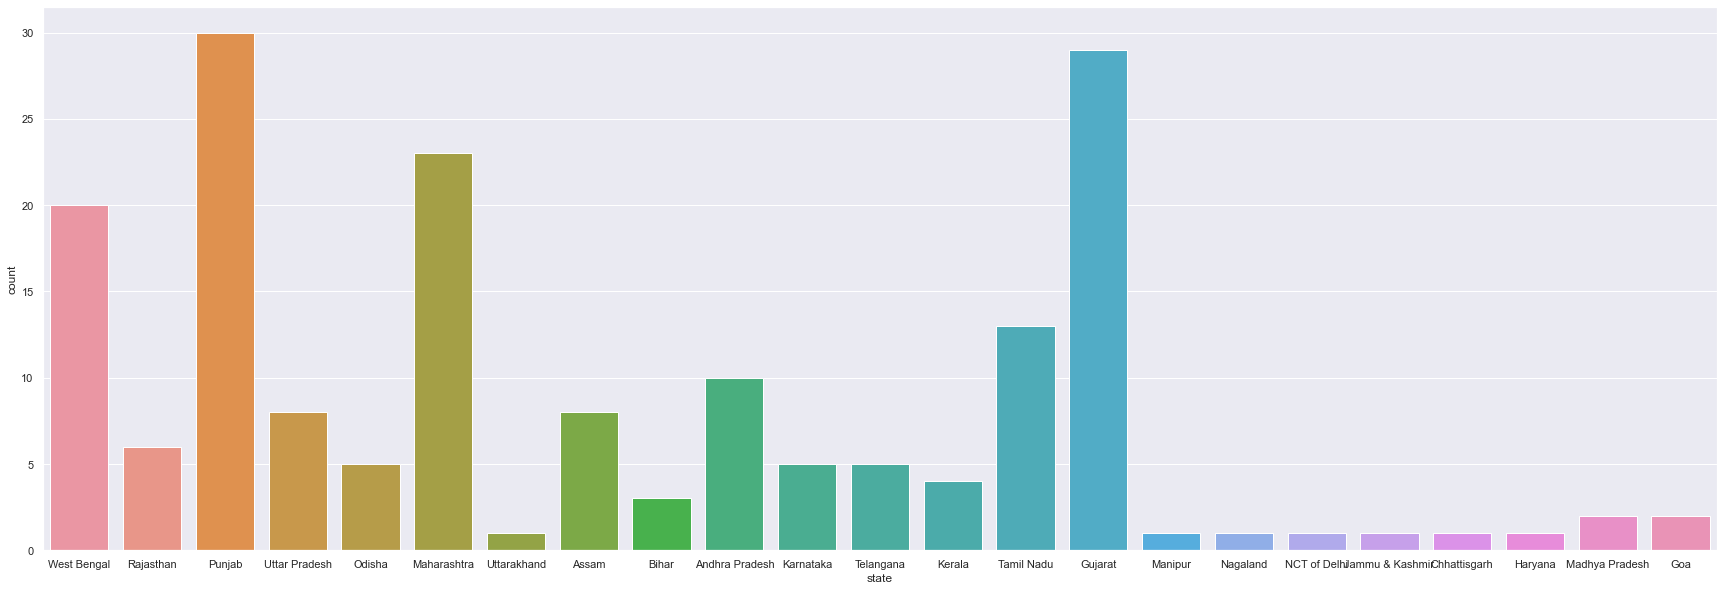

In [22]:
sns.set(rc={'figure.figsize':(30,10)})
print("********** "+'state'+" **********")
print(df['state'].value_counts())
# count plot on single categorical variable
sns.countplot(x =df['state'], data = df)
# Show the plot
plt.show()
print("")

<AxesSubplot:ylabel='state'>

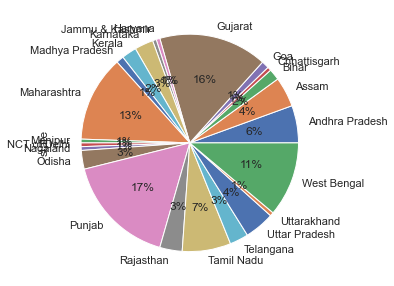

In [23]:
flavor_profile_pie = df['state'].value_counts()
flavor_profile_pie.groupby(flavor_profile_pie.index).sum().plot(kind='pie', y=flavor_profile_pie.values, autopct='%1.0f%%',figsize = (5,5))

###Region-wise Distribution of course

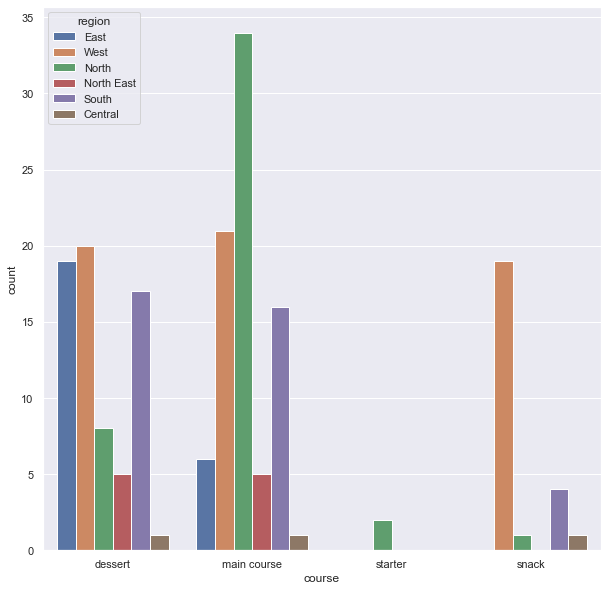

In [24]:
sns.set(rc={'figure.figsize':(10,10)})
# count plot on two categorical variable
sns.countplot(x ='course', hue = "region", data = df)
 
# Show the plot
plt.show()

###Region-wise distribution of diet

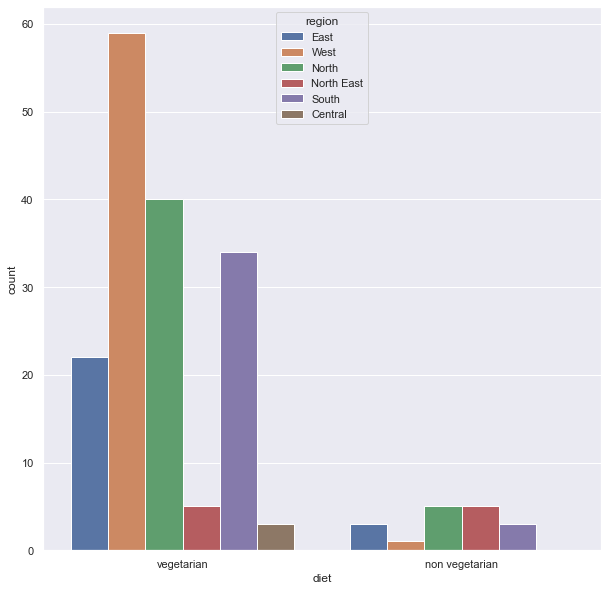

In [25]:
sns.set(rc={'figure.figsize':(10,10)})
# count plot on two categorical variable
sns.countplot(x ='diet', hue = "region", data = df)
 
# Show the plot
plt.show()

###Region-wise state and their rspective number of dishes

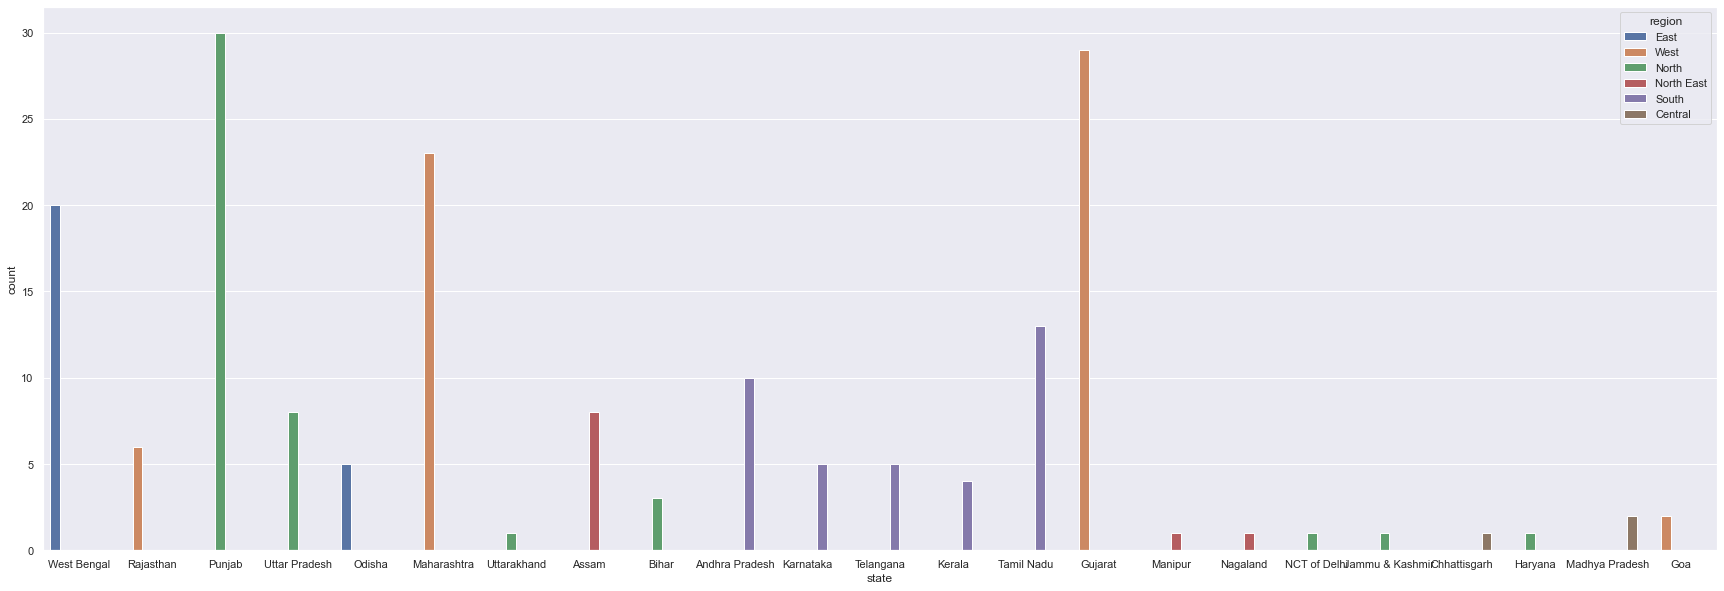

In [26]:
sns.set(rc={'figure.figsize':(30,10)})
# count plot on two categorical variable
sns.countplot(x ='state', hue = "region", data = df)
 
# Show the plot
plt.show()

# Model Building

Steps in model-building

```
# decapitalizing
# removing the space between the two words
# using countvectorizer
# finding cosine similarity
# recommending based on cosine similarity

```



###Decapitalizig And Removing The Space Between Two Words

In [27]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [28]:
df['ingredients'] = df['ingredients'].apply(lambda x:x.lower())
df['ingredients'] = df['ingredients'].apply(lambda x:x.split(','))
df['ingredients'] = df['ingredients'].apply(collapse)


In [29]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'index'],
      dtype='object')

In [30]:
cols = ['diet','flavor_profile', 'course', 'state', 'region']

for i in cols:
  df[i] = df[i].apply(lambda x:x.lower())
  df[i] = df[i].apply(lambda x:x.split(','))
  df[i] = df[i].apply(collapse)


In [31]:
df['prep_time'] = df['prep_time'].astype(object)
df['cook_time'] = df['cook_time'].astype(object)


In [32]:
df.dtypes

name              object
ingredients       object
diet              object
prep_time         object
cook_time         object
flavor_profile    object
course            object
state             object
region            object
index              int64
dtype: object

In [33]:
df["dish_features"] = df['ingredients'] + df['diet']+df['flavor_profile']+df['course']
# +df['state']+df['region']

In [34]:
df = df.drop(columns = ['ingredients','diet','flavor_profile','course','state','region','prep_time','cook_time'])

In [35]:
df['dish_features'] = df['dish_features'].apply(lambda x: " ".join(x))
df.head()

,name,index,dish_features
0,Balu shahi,0,maidaflour yogurt oil sugar vegetarian sweet d...
1,Boondi,1,gramflour ghee sugar vegetarian sweet dessert
2,Gajar ka halwa,2,carrots milk sugar ghee cashews raisins vegeta...
3,Ghevar,3,flour ghee kewra milk clarifiedbutter sugar al...
4,Gulab jamun,4,milkpowder plainflour bakingpowder ghee milk s...


In [36]:
df.columns

Index(['name', 'index', 'dish_features'], dtype='object')

In [37]:
df

,name,index,dish_features
0,Balu shahi,0,maidaflour yogurt oil sugar vegetarian sweet d...
1,Boondi,1,gramflour ghee sugar vegetarian sweet dessert
2,Gajar ka halwa,2,carrots milk sugar ghee cashews raisins vegeta...
3,Ghevar,3,flour ghee kewra milk clarifiedbutter sugar al...
4,Gulab jamun,4,milkpowder plainflour bakingpowder ghee milk s...
...,...,...,...
175,Prawn malai curry,175,coconutmilk prawns garlic turmeric sugar nonve...
176,Shukto,176,greenbeans bittergourd ridgegourd banana brinj...
177,Til Pitha,177,glutinousrice blacksesameseeds gur vegetarian ...
178,Bebinca,178,coconutmilk eggyolks clarifiedbutter allpurpos...


In [38]:
import pickle

In [39]:
pickle.dump(df.to_dict(),open('dish_dict.pkl','wb'))

In [40]:
df.columns

Index(['name', 'index', 'dish_features'], dtype='object')

In [41]:
df.dtypes

name             object
index             int64
dish_features    object
dtype: object

In [42]:
df.shape

(180, 3)

###Using CountVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [44]:
vector = cv.fit_transform(df['dish_features']).toarray()

In [45]:
vector[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [46]:
cv.get_feature_names()

c:\Users\Amitkumar.S\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['allpurposeflour',
 'almond',
 'almonds',
 'aloo',
 'alumpowder',
 'amaranthleaves',
 'amchurpowder',
 'apricots',
 'arbikepatte',
 'arhardal',
 'arrowrootpowder',
 'atta',
 'avocadooil',
 'axone',
 'babycorn',
 'babypotatoes',
 'badam',
 'bakingpowder',
 'bakingsoda',
 'banana',
 'basmatirice',
 'bayleaf',
 'beans',
 'beatenriceflakes',
 'beef',
 'bellpepper',
 'bellpeppers',
 'bengalgramflour',
 'besan',
 'besanflour',
 'bhatura',
 'biryanimasalapowder',
 'bitter',
 'bittergourd',
 'blacklentils',
 'blackpepper',
 'blacksalt',
 'blacksesameseeds',
 'boiledpotatoes',
 'bottlegourd',
 'breadcrumbs',
 'brinjal',
 'butter',
 'cabbage',
 'cannedcoconutmilk',
 'capsicum',
 'cardamom',
 'cardamompowder',
 'carrot',
 'carrots',
 'cashewnuts',
 'cashews',
 'cashewsandraisins',
 'cauliflower',
 'chanadaal',
 'chanadal',
 'chenna',
 'chennacheese',
 'chhena',
 'chicken',
 'chickenchunks',
 'chickenthighs',
 'chickpeaflour',
 'chickpeas',
 'chilipowder',
 'chilli',
 'chillies',
 'chole',
 'cila

In [47]:
vector.shape

(180, 295)

###Finding Cosine-Similarity

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
similarity = cosine_similarity(vector)

In [50]:
similarity.shape

(180, 180)

In [51]:
pickle.dump(similarity,open('similarity.pkl','wb'))

###Recommending Based On Cosine-Similaity

In [52]:
def recommend(dish):
    index = df[df['name'] == dish].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[0:6]:
      print(df.name[i[0]],"\t",df.dish_features[i[0]])
      

        

# Model-Evaluation

In [53]:
recommend('Shukto')

Shukto 	 greenbeans bittergourd ridgegourd banana brinjal vegetarian spicy maincourse
Navrattan korma 	 greenbeans potatoes khuskhus lowfat garammasalapowder vegetarian spicy maincourse
Turiya Patra Vatana sabji 	 ridgegourd bakingsoda sugar gratedcoconut peas vegetarian spicy maincourse
Misi roti 	 wholewheatflour chickpeaflour greenchilies vegetarian spicy maincourse
Bajri no rotlo 	 wheatflour pearlmilletflour hotwater vegetarian spicy maincourse
Paratha 	 wheatflour butter potato coriander vegetarian spicy maincourse


In [54]:
recommend('Gulab jamun')

Gulab jamun 	 milkpowder plainflour bakingpowder ghee milk sugar water rosewater vegetarian sweet dessert
Boondi 	 gramflour ghee sugar vegetarian sweet dessert
Kalakand 	 milk cottagecheese sugar vegetarian sweet dessert
Chhena jalebi 	 chhena sugar ghee vegetarian sweet dessert
Ledikeni 	 chhena sugar ghee vegetarian sweet dessert
Mihidana 	 besanflour sugar ghee vegetarian sweet dessert


In [55]:
recommend('Boondi')

Boondi 	 gramflour ghee sugar vegetarian sweet dessert
Chhena jalebi 	 chhena sugar ghee vegetarian sweet dessert
Ledikeni 	 chhena sugar ghee vegetarian sweet dessert
Mihidana 	 besanflour sugar ghee vegetarian sweet dessert
Sutar feni 	 maida sugar ghee vegetarian sweet dessert
Pantua 	 chhena sugar ghee flour vegetarian sweet dessert


In [56]:
recommend('Malapua')

Malapua 	 yoghurt refinedflour ghee fennelseeds vegetarian sweet dessert
Boondi 	 gramflour ghee sugar vegetarian sweet dessert
Sohan halwa 	 cornflour ghee dryfruits vegetarian sweet dessert
Chhena jalebi 	 chhena sugar ghee vegetarian sweet dessert
Ledikeni 	 chhena sugar ghee vegetarian sweet dessert
Mihidana 	 besanflour sugar ghee vegetarian sweet dessert
